### 1. Overview

#### 1.1 Research Questions

How is this user liking posts?

Through the analysis of the post data I hope to reveal trends in how this user is liking posts.

### 2. Data

The data for this report comes from the "Your Instagram Data" files available for download through the user's "Privacy and Security" settings. In the data dump is a file named "liked_posts.json" which was read in and loaded to a Python 3 environment.

In [3]:
from platform import python_version

print(python_version())

3.9.1


The following packages were used in this analysis.

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
with open('/Volumes/Drive2/EMAT22110_Notebooks/ethan_instagram/likes/liked_posts.json') as li:
    likes_list = json.load(li)

In [21]:
type(likes_list)

dict

In [24]:
type(likes_list['likes_media_likes'])

list

In [27]:
likes = likes_list['likes_media_likes']
likes[0].keys()

dict_keys(['title', 'media_list_data', 'string_list_data'])

The "liked_posts.json" file contains a list of all the posts the user has liked with in each list item is a dictionary containing the name of the account that owned the liked post as well as media_list_data and string_list_data.

The JSON files was converted to a DataFrame and summarized by counting each like per account.

In [98]:
likes_df = pd.DataFrame(likes, column)

,title,media_list_data,string_list_data
0,iss,[],"[{'href': '', 'value': 'ð', 'timestamp': 14..."
1,iss,[],"[{'href': '', 'value': 'ð', 'timestamp': 14..."
2,iss,[],"[{'href': '', 'value': 'ð', 'timestamp': 14..."
3,iss,[],"[{'href': '', 'value': 'ð', 'timestamp': 14..."
4,smartcarusa,[],"[{'href': '', 'value': 'ð', 'timestamp': 14..."
...,...,...,...
10363,natgeo,[],"[{'href': '', 'value': 'ð', 'timestamp': 14..."
10364,iss,[],"[{'href': '', 'value': 'ð', 'timestamp': 14..."
10365,iss,[],"[{'href': '', 'value': 'ð', 'timestamp': 14..."
10366,iss,[],"[{'href': '', 'value': 'ð', 'timestamp': 14..."


In [33]:
likes_group_df = likes_df.groupby('title').count().sort_values('media_list_data', ascending = False)
likes_group_df

,media_list_data,string_list_data
title,,
natgeo,2518,2518
nasa,770,770
iss,649,649
smartcarusa,361,361
verge,307,307
...,...,...
mckenzie.quartz,1,1
mattydiver,1,1
materialisenv,1,1


### 3. Analysis

/Volumes/Drive2/EMAT22110/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='media_list_data', ylabel='Density'>

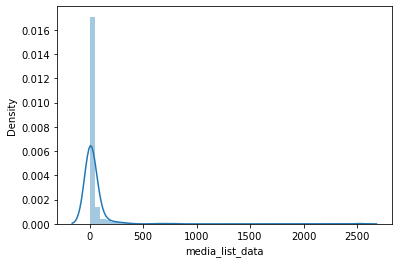

In [99]:
sns.distplot(likes_group_df['media_list_data'])

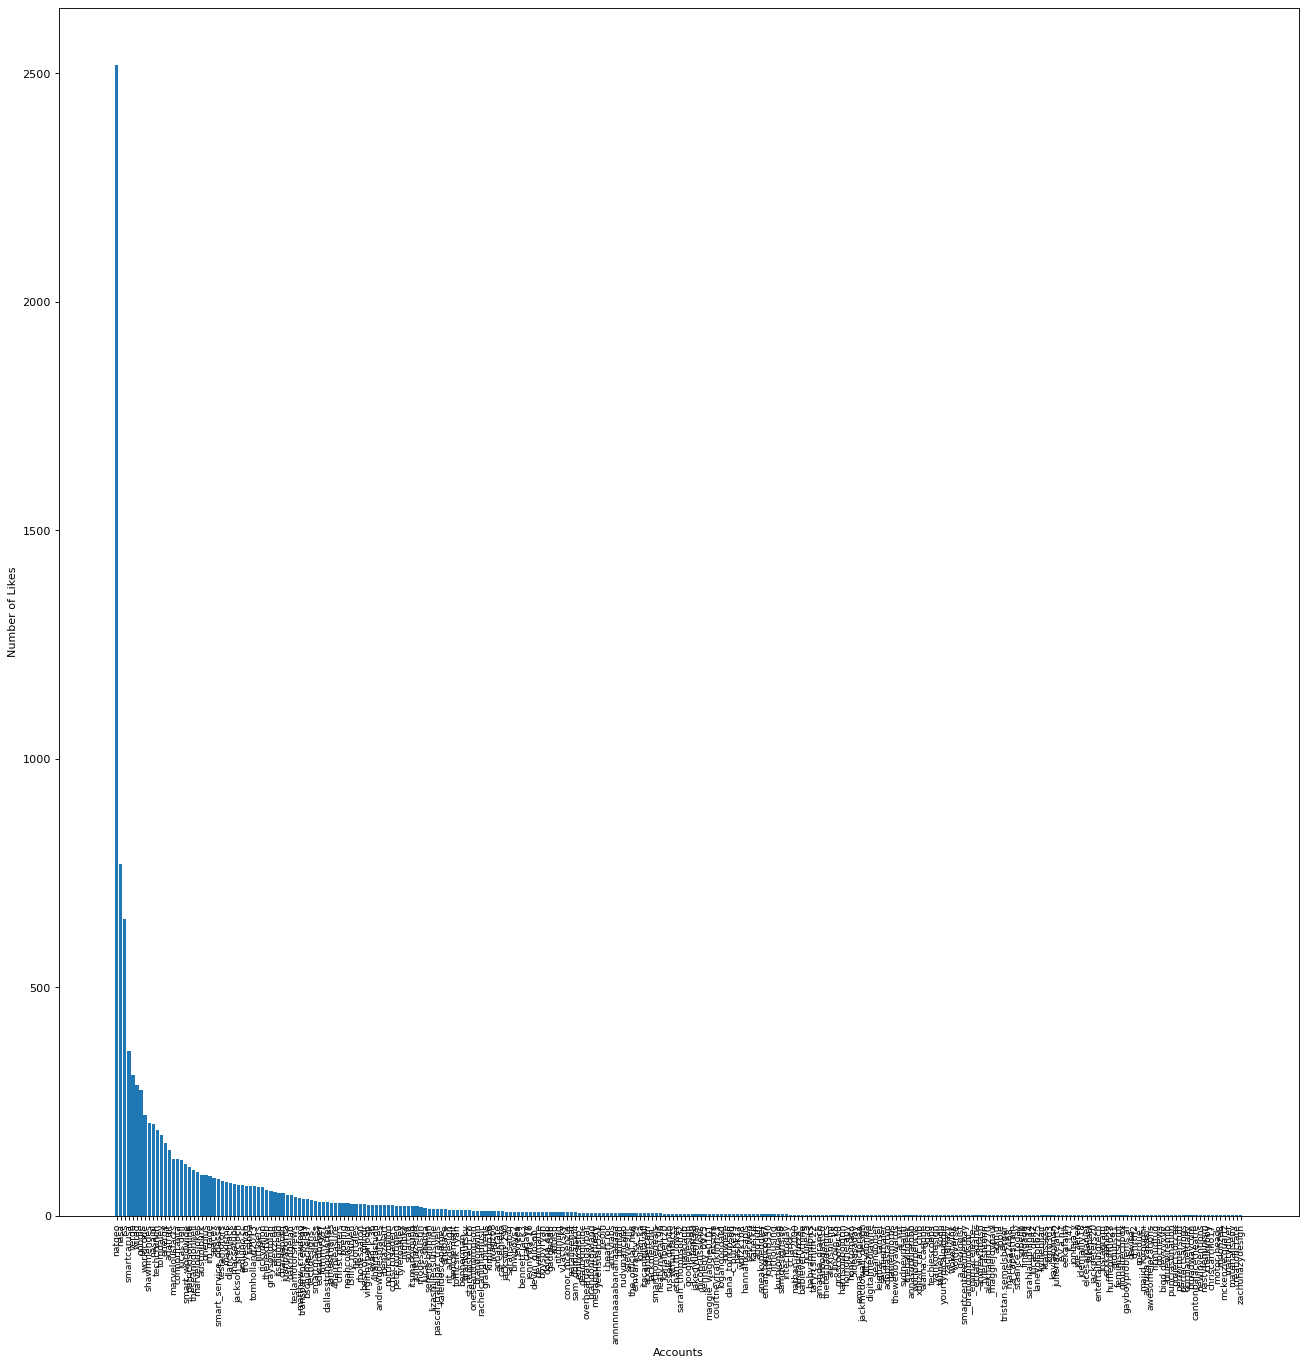

In [88]:
labels = likes_group_df['media_list_data'].keys()
vals = likes_group_df['media_list_data']
width = .75

fig, ax = plt.subplots(figsize=(20,20), dpi = 80, facecolor='w', edgecolor='k')
ax.bar(labels,vals)
ax.set_ylabel('Number of Likes')
ax.set_xlabel('Accounts')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

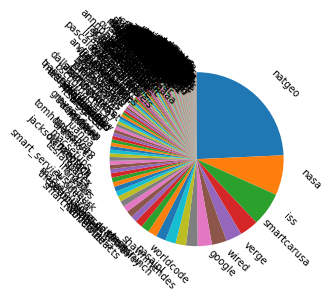

In [95]:
title = likes_group_df['media_list_data'].keys()
pieplot = plt.pie(x=likes_group_df['media_list_data'],
                 labels = title, startangle = 90,
                 counterclock = False, labeldistance = 1.2,
                 textprops = {'rotation': -45})

### 4. Conclusions

#### 4.1 Findings

I found the this user liked natgeo posts more than any other account, also topping the list of most likes was NASA and the ISS. The user also liked a large number of posts from a few accounts and liked a single post from a large number of accounts.

#### 4.2 Limitations & Future Steps

An interseting approach to analizing this data might be to show the number of likes over time to see when the user was most active on Instagram or if the user is consistantly interacting with these posts. That ananlysis begs the question how did the user's interactions with posts change over over. It might also be help to see if the time spent on the app corrolated to the number of likes being made.